### Import required libraries

In [57]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load & Read the data

In [93]:
df=pd.read_csv("D:/PGP IN DATA SCIENCE with Careerera/Data Sets/data-for-time-series/Tractor-Sales.csv")
df.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


### Shape & Size of data

In [3]:
df.shape

(144, 2)

In [4]:
df.size

288

### Null value

In [5]:
df.isna().sum()

Month-Year                0
Number of Tractor Sold    0
dtype: int64

### Data types

In [7]:
df.dtypes

Month-Year                object
Number of Tractor Sold     int64
dtype: object

Month-Year column's data type is Object hence we cannot perform Time Series forecasting.
Change data type object to Date time

In [94]:
df['Date']=pd.to_datetime(df['Month-Year'], format='%b-%y')

In [9]:
df.dtypes

Month-Year                        object
Number of Tractor Sold             int64
Date                      datetime64[ns]
dtype: object

In [95]:
#drop the old Month-Year column
df1=df.drop(columns=["Month-Year"])

In [11]:
df['Date'].min()

Timestamp('2003-01-01 00:00:00')

In [12]:
df['Date'].max()

Timestamp('2014-12-01 00:00:00')

In [13]:
df['Date'].dt.year

0      2003
1      2003
2      2003
3      2003
4      2003
       ... 
139    2014
140    2014
141    2014
142    2014
143    2014
Name: Date, Length: 144, dtype: int64

Our data is monthly basis, so check whether all months data is present or not

In [14]:
#total year are 12 and data is monthly data hence
12*12

144

In [15]:
df1.shape

(144, 2)

No missing rows.

### EDA

#### Create Month & Year column from Date column

In [96]:
df1['Year']=df1['Date'].dt.year
df1['Month']=df1['Date'].dt.month

In [97]:
df1.head()

,Number of Tractor Sold,Date,Year,Month
0,141,2003-01-01,2003,1
1,157,2003-02-01,2003,2
2,185,2003-03-01,2003,3
3,199,2003-04-01,2003,4
4,203,2003-05-01,2003,5


In [18]:
df1.dtypes

Number of Tractor Sold             int64
Date                      datetime64[ns]
Year                               int64
Month                              int64
dtype: object

### Plot Sales vs Year wrt Month

In [98]:
summary0=df1.pivot("Year","Month", values="Number of Tractor Sold")
summary0

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2003,141,157,185,199,203,189,207,207,171,150,138,165
2004,145,168,197,208,210,209,238,238,199,168,152,196
2005,183,200,249,251,289,249,279,279,232,204,194,232
2006,215,239,270,279,307,305,322,339,263,241,229,272
2007,247,261,330,362,385,340,370,381,299,266,239,281
2008,257,250,329,350,393,370,423,410,326,289,270,321
2009,305,310,374,414,454,441,510,486,393,345,315,389
2010,358,368,444,482,534,524,578,567,447,386,360,428
2011,397,400,498,536,596,591,651,654,509,437,406,470


<AxesSubplot:xlabel='Year'>

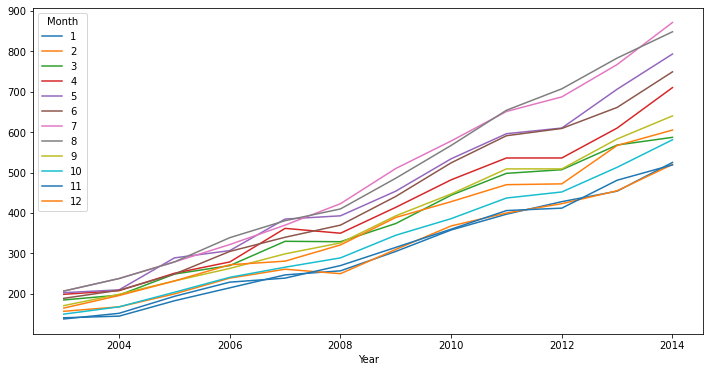

In [101]:
summary0.plot(figsize=(12,6))

### Plot Sales vs Month wrt Year

In [102]:
summary1=df1.pivot("Month","Year", values="Number of Tractor Sold")
summary1

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
1,141,145,183,215,247,257,305,358,397,428,454,525
2,157,168,200,239,261,250,310,368,400,423,455,520
3,185,197,249,270,330,329,374,444,498,507,568,587
4,199,208,251,279,362,350,414,482,536,536,610,710
5,203,210,289,307,385,393,454,534,596,610,706,793
6,189,209,249,305,340,370,441,524,591,609,661,749
7,207,238,279,322,370,423,510,578,651,687,767,871
8,207,238,279,339,381,410,486,567,654,707,783,848
9,171,199,232,263,299,326,393,447,509,509,583,640


<AxesSubplot:xlabel='Month'>

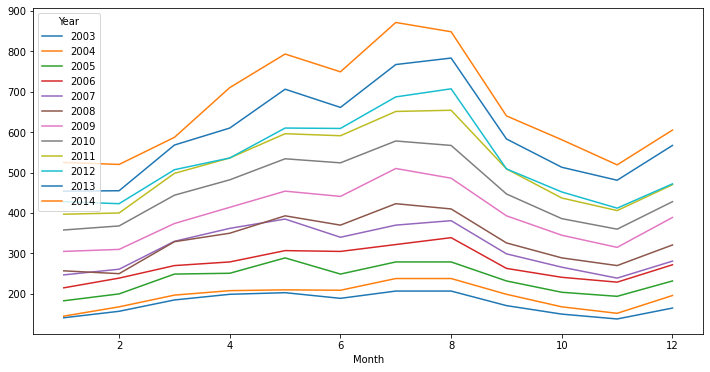

In [103]:
summary1.plot(figsize=(12,6))

In [104]:
#Set Date as index
df1.set_index(["Date"], inplace=True)
df1.head()

,Number of Tractor Sold,Year,Month
Date,,,
2003-01-01,141,2003,1
2003-02-01,157,2003,2
2003-03-01,185,2003,3
2003-04-01,199,2003,4
2003-05-01,203,2003,5


In [105]:
#Change column name for our convenience
df1.rename(columns={"Number of Tractor Sold":"Sales"}, inplace=True)

In [106]:
yt=df1.Sales
yt

Date
2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Name: Sales, Length: 144, dtype: int64

### Forecast using Moving Average Method

In [110]:
Moving_Average_with_windos_2=yt.rolling(window=2).mean()
Moving_Average_with_windos_2

Date
2003-01-01      NaN
2003-02-01    149.0
2003-03-01    171.0
2003-04-01    192.0
2003-05-01    201.0
              ...  
2014-08-01    859.5
2014-09-01    744.0
2014-10-01    610.5
2014-11-01    550.0
2014-12-01    562.0
Name: Sales, Length: 144, dtype: float64

In [111]:
Moving_Average_with_windos_3=yt.rolling(window=3).mean()
Moving_Average_with_windos_3

Date
2003-01-01           NaN
2003-02-01           NaN
2003-03-01    161.000000
2003-04-01    180.333333
2003-05-01    195.666667
                 ...    
2014-08-01    822.666667
2014-09-01    786.333333
2014-10-01    689.666667
2014-11-01    580.000000
2014-12-01    568.333333
Name: Sales, Length: 144, dtype: float64

In [112]:
Moving_Average_with_windos_4=yt.rolling(window=4).mean()
Moving_Average_with_windos_4

Date
2003-01-01       NaN
2003-02-01       NaN
2003-03-01       NaN
2003-04-01    170.50
2003-05-01    186.00
               ...  
2014-08-01    815.25
2014-09-01    777.00
2014-10-01    735.00
2014-11-01    647.00
2014-12-01    586.25
Name: Sales, Length: 144, dtype: float64

In [113]:
Moving_Average_with_windos_11=yt.rolling(window=11).mean()
Moving_Average_with_windos_11

Date
2003-01-01           NaN
2003-02-01           NaN
2003-03-01           NaN
2003-04-01           NaN
2003-05-01           NaN
                 ...    
2014-08-01    651.272727
2014-09-01    662.818182
2014-10-01    671.909091
2014-11-01    667.545455
2014-12-01    674.818182
Name: Sales, Length: 144, dtype: float64

#### Plot above average

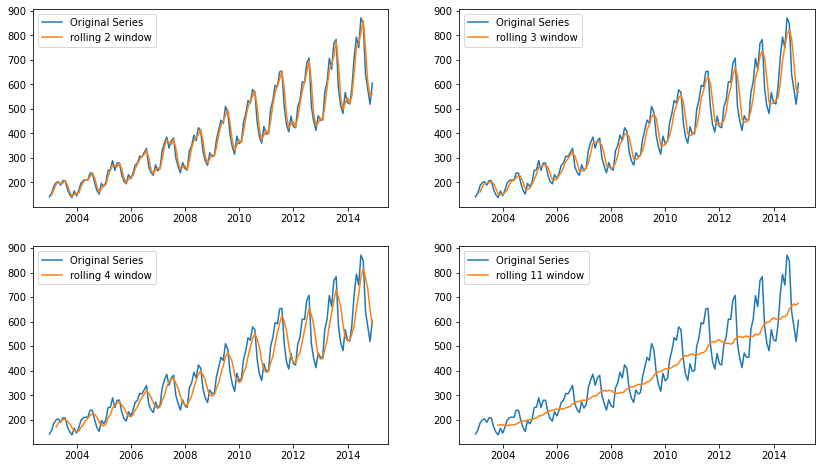

In [107]:
fig, axes=plt.subplots(2,2,sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(yt.index, yt, label="Original Series")
axes[0][0].plot(yt.index, yt.rolling(window=2).mean(), label="rolling 2 window")
axes[0][0].legend()

axes[0][1].plot(yt.index, yt, label="Original Series")
axes[0][1].plot(yt.index, yt.rolling(window=3).mean(), label="rolling 3 window")
axes[0][1].legend()

axes[1][0].plot(yt.index, yt, label="Original Series")
axes[1][0].plot(yt.index, yt.rolling(window=4).mean(), label="rolling 4 window")
axes[1][0].legend()

axes[1][1].plot(yt.index, yt, label="Original Series")
axes[1][1].plot(yt.index, yt.rolling(window=11).mean(), label="rolling 11 window")
axes[1][1].legend()

From above we can clearly see the Trend & Seasonality hence hence "Multiplicative Model"

### Decomposition

In [114]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [115]:
decomposition=seasonal_decompose(yt, model='multiplicative',two_sided=False, extrapolate_trend=4)

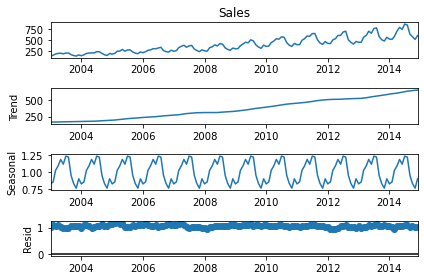

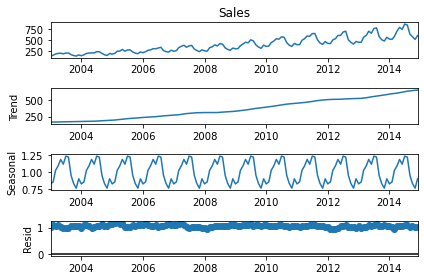

In [116]:
decomposition.plot()

In [30]:
pd.DataFrame({"Actual":decomposition.observed, "Seasonal":decomposition.seasonal, "Trend":decomposition.trend, "Resid":decomposition.resid})

,Actual,Seasonal,Trend,Resid
Date,,,,
2003-01-01,141.0,0.823508,166.408333,1.028907
2003-02-01,157.0,0.853891,167.216667,1.099557
2003-03-01,185.0,1.024830,168.025000,1.074350
2003-04-01,199.0,1.092962,168.833333,1.078424
2003-05-01,203.0,1.187805,169.641667,1.007438
...,...,...,...,...
2014-08-01,848.0,1.222687,642.875000,1.078833
2014-09-01,640.0,0.950868,647.958333,1.038754
2014-10-01,581.0,0.829943,653.166667,1.071776


In [31]:
dir(decomposition)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_observed',
 '_resid',
 '_seasonal',
 '_trend',
 '_weights',
 'nobs',
 'observed',
 'plot',
 'resid',
 'seasonal',
 'trend',
 'weights']

### Forecasting using ETS Method

#### When alpa is taken it is single ETS, when alpha & beta taken it is double ETS, when alpha, beta & gamma taken then it is tripple ETS.

#### Split data into train & test

In [117]:
train=yt[:"2014-06-01"]
test=yt["2014-07-01":]

In [118]:
train

Date
2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-02-01    520
2014-03-01    587
2014-04-01    710
2014-05-01    793
2014-06-01    749
Name: Sales, Length: 138, dtype: int64

In [34]:
test

Date
2014-07-01    871
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Name: Sales, dtype: int64

In [119]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

alpha=0.4
beta=0.3
gamma=0.1
ets_model=ExponentialSmoothing(train, trend='mul',seasonal='mul',seasonal_periods=12)
ets_fit=ets_model.fit(smoothing_level=alpha, smoothing_slope=beta,smoothing_seasonal=gamma)

In [120]:
fcast=ets_fit.forecast(6)
fcast

2014-07-01    833.871924
2014-08-01    832.132809
2014-09-01    637.391366
2014-10-01    557.400284
2014-11-01    513.491494
2014-12-01    605.670880
Freq: MS, dtype: float64

In [121]:
test

Date
2014-07-01    871
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Name: Sales, dtype: int64

In [122]:
print("MSE",np.mean((fcast-test)**2))

MSE 370.8011757097343


Mean Squared Error(MSE) high, to reduce this use different combination of alpha, beta & gamma.

In [123]:
a=np.linspace(0,1,5)
b=np.linspace(0,1,5)
g=np.linspace(0,1,5)

In [125]:
total=len(a)*len(b)*len(g)

best_alpha=np.inf
best_beta=np.inf
best_gamma=np.inf
best_mse=np.inf
count=0
for i in a:
    for j in b:
        for k in g:
            ets_model=ExponentialSmoothing(train, trend='mul',seasonal='mul',seasonal_periods=12)
            ets_fit=ets_model.fit(smoothing_level=i, smoothing_slope=j,smoothing_seasonal=k)
            fcast0=ets_fit.forecast(6)
            mse=np.mean((fcast0-test)**2)
            count=count+1
            print(f"Model {count}/{total} \n for alpha : {i}, beta : {j}, and gamma : {k}, the MSE is {mse}")
            if mse<best_mse:
                best_mse=mse
                best_alpha=i
                best_beta=j
                best_gamma=k
                
best_values={"Alpha":best_alpha, "Beta":best_beta, "Gamma":best_gamma, "MSE":best_mse}

Model 1/125 
 for alpha : 0.0, beta : 0.0, and gamma : 0.0, the MSE is 7990021863477.427
Model 2/125 
 for alpha : 0.0, beta : 0.0, and gamma : 0.25, the MSE is 647.6362955435138
Model 3/125 
 for alpha : 0.0, beta : 0.0, and gamma : 0.5, the MSE is 435.1693942410254
Model 4/125 
 for alpha : 0.0, beta : 0.0, and gamma : 0.75, the MSE is 317.43635697621977
Model 5/125 
 for alpha : 0.0, beta : 0.0, and gamma : 1.0, the MSE is 363.21864250070456
Model 6/125 
 for alpha : 0.0, beta : 0.25, and gamma : 0.0, the MSE is 7990021863477.427
Model 7/125 
 for alpha : 0.0, beta : 0.25, and gamma : 0.25, the MSE is 647.6374745989159
Model 8/125 
 for alpha : 0.0, beta : 0.25, and gamma : 0.5, the MSE is 435.16279447573703
Model 9/125 
 for alpha : 0.0, beta : 0.25, and gamma : 0.75, the MSE is 317.43635697621977
Model 10/125 
 for alpha : 0.0, beta : 0.25, and gamma : 1.0, the MSE is 363.21864250070456
Model 11/125 
 for alpha : 0.0, beta : 0.5, and gamma : 0.0, the MSE is 7990021863477.427
Model

Model 91/125 
 for alpha : 0.75, beta : 0.75, and gamma : 0.0, the MSE is 886.3655268427565
Model 92/125 
 for alpha : 0.75, beta : 0.75, and gamma : 0.25, the MSE is 177.2074016757695
Model 93/125 
 for alpha : 0.75, beta : 0.75, and gamma : 0.5, the MSE is 998.9018477517808
Model 94/125 
 for alpha : 0.75, beta : 0.75, and gamma : 0.75, the MSE is 225265.81432175168
Model 95/125 
 for alpha : 0.75, beta : 0.75, and gamma : 1.0, the MSE is 3.886888151697409e+25
Model 96/125 
 for alpha : 0.75, beta : 1.0, and gamma : 0.0, the MSE is 139.10658498668408
Model 97/125 
 for alpha : 0.75, beta : 1.0, and gamma : 0.25, the MSE is 643.5745771577461
Model 98/125 
 for alpha : 0.75, beta : 1.0, and gamma : 0.5, the MSE is 1453.096471545323
Model 99/125 
 for alpha : 0.75, beta : 1.0, and gamma : 0.75, the MSE is 399478.09146443167
Model 100/125 
 for alpha : 0.75, beta : 1.0, and gamma : 1.0, the MSE is 368306126.6398818
Model 101/125 
 for alpha : 1.0, beta : 0.0, and gamma : 0.0, the MSE is 

In [126]:
best_values

{'Alpha': 0.75, 'Beta': 1.0, 'Gamma': 0.0, 'MSE': 139.10658498668408}

Lets use above values to train our model

In [127]:
alpha=0.75
beta=1.0
gamma= 0.0
ets_model=ExponentialSmoothing(train, trend='mul',seasonal='mul',seasonal_periods=12)
ets_fit=ets_model.fit(smoothing_level=alpha, smoothing_slope=beta,smoothing_seasonal=gamma)

Forecast the Future Sales

In [128]:
fcast=ets_fit.forecast(6)
fcast

2014-07-01    852.046408
2014-08-01    850.703941
2014-09-01    650.187189
2014-10-01    567.439750
2014-11-01    523.949641
2014-12-01    617.487250
Freq: MS, dtype: float64

In [129]:
test

Date
2014-07-01    871
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Name: Sales, dtype: int64

In [130]:
print("MSE",np.mean((fcast-test)**2))

MSE 139.10658498668408


#### Actuual vs Predicted Values

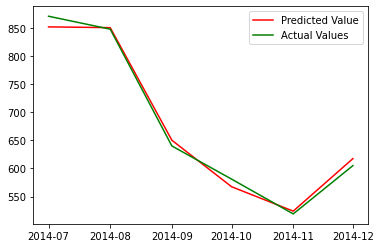

In [131]:
d=pd.DataFrame(fcast.reset_index())
d.columns=["Date","Predicted"]

d1=pd.DataFrame(test.reset_index())
d1.columns=["Date","Actual"]
final=pd.merge(d,d1,on="Date",how="inner")
plt.plot(final["Date"],final["Predicted"], label="Predicted Value", color="red")
plt.plot(final["Date"],final["Actual"], label="Actual Values",color="green")
plt.legend()
plt.show()

Forecast for Unseen Data

In [167]:
alpha=0.75
beta=1.0
gamma= 0.0
ets_model=ExponentialSmoothing(train, trend='mul',seasonal='mul',seasonal_periods=12)
ets_fit=ets_model.fit(smoothing_level=alpha, smoothing_slope=beta,smoothing_seasonal=gamma)

In [168]:
fcast=ets_fit.forecast(18)
fcast

2014-07-01    852.046408
2014-08-01    850.703941
2014-09-01    650.187189
2014-10-01    567.439750
2014-11-01    523.949641
2014-12-01    617.487250
2015-01-01    572.667254
2015-02-01    580.945165
2015-03-01    700.862988
2015-04-01    767.090098
2015-05-01    854.849655
2015-06-01    815.610539
2015-07-01    915.019681
2015-08-01    913.577995
2015-09-01    698.241397
2015-10-01    609.378239
2015-11-01    562.673851
2015-12-01    663.124663
Freq: MS, dtype: float64

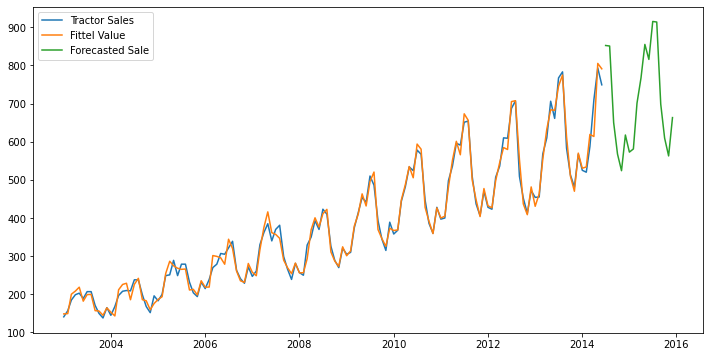

In [171]:
plt.figure(figsize=(12,6))
plt.plot(train, label='Tractor Sales')
plt.plot(ets_fit.fittedvalues, label='Fittel Value')
plt.plot(fcast, label='Forecasted Sale')
plt.legend()
plt.show()